In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab as pl
from numpy import fft
import statsmodels.api as sm
PATH = "full_onion_data.csv"

df = pd.read_csv(PATH)
df = df.drop(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX'], axis= 1)
df['DATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
df = df.set_index("DATE")
df['MODAL'] = df['MODAL'].apply(lambda x: int(x))
df.sort_index(inplace=True)
df

,MODAL
DATE,
2010-01-01,1250
2010-01-02,1375
2010-01-04,1150
2010-01-05,1125
2010-01-07,1150
...,...
2020-08-26,1450
2020-08-27,1650
2020-08-28,1600


In [4]:
#train_test_split
tr_st = '2010-01-01'
tr_end = '2019-08-01'

ts_st ='2019-08-02'
ts_end ='2020-08-31'

tra = df['MODAL'][tr_st:tr_end]
tes = df['MODAL'][ts_st:ts_end]
display(tra)
display(tes)

DATE
2010-01-01    1250
2010-01-02    1375
2010-01-04    1150
2010-01-05    1125
2010-01-07    1150
              ... 
2019-07-25    1250
2019-07-27    1250
2019-07-30    1225
2019-07-31    1325
2019-08-01    1325
Name: MODAL, Length: 2425, dtype: int64

DATE
2019-08-02    1275
2019-08-03    1375
2019-08-04    1275
2019-08-05    1275
2019-08-06    1300
              ... 
2020-08-26    1450
2020-08-27    1650
2020-08-28    1600
2020-08-29    1550
2020-08-31    1625
Name: MODAL, Length: 257, dtype: int64

In [5]:
def fourierExtrapolation(x, n_predict, nt):
    n = x.size
    n_harm = nt                # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

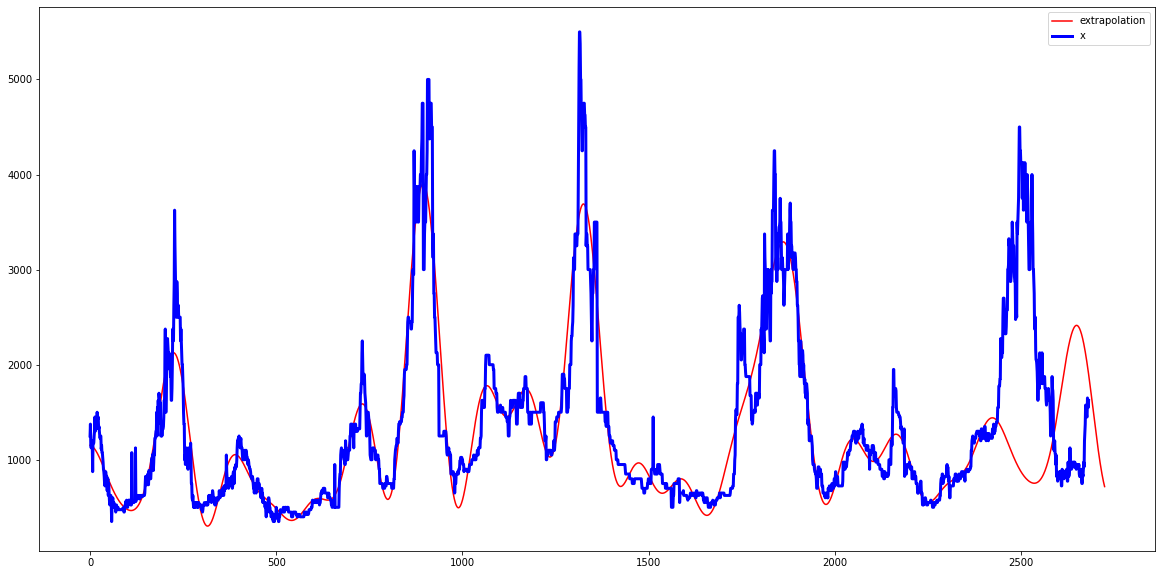

In [8]:
x = df['MODAL'][:tr_end]
n_predict = 300
extrapolation = fourierExtrapolation(x, n_predict, 20)
x = df['MODAL']
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
pl.legend()
plt.gcf().set_size_inches(20, 10)
pl.show()

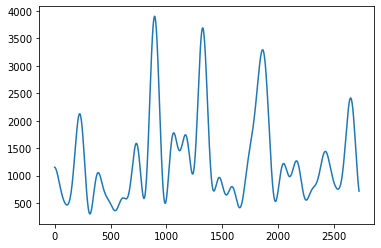

In [11]:
plt.plot(extrapolation)

In [12]:
extrapolation

array([1152.89749807, 1151.77751481, 1150.27887404, ...,  751.06509444,
        734.11862812,  718.07839106])